# 加法運算:&nbsp;&nbsp;將兩張影像的像素值相加
※影像的尺寸大小需要一致，否則會有錯誤。<br><br>
+: 對影像a和影像b進行求和的運算。mod()是取模運算，"mod(a+b, 256)"表示計算「a+b的和除以256取餘數」。<br>
$$ a+b= \begin{cases} a+b, & \text {a+b $\leq$ 255} \\ mod(a+b,255), & \text{a+b > 255} \end{cases} $$

cv2.add(image1, image2): 用於計算影像像素相加的和。
$$ a+b= \begin{cases} a+b, & \text {a+b $\leq$ 255} \\ 255, & \text{a+b > 255} \end{cases} $$

In [21]:
!wget https://upload.wikimedia.org/wikipedia/commons/5/53/OpenCV_Logo_with_text.png -O opencv.png
!wget https://pbs.twimg.com/media/ECtgOCaUEAAFAMI.jpg -O face.jpg

--2020-10-08 15:15:40--  https://upload.wikimedia.org/wikipedia/commons/5/53/OpenCV_Logo_with_text.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31958 (31K) [image/png]
Saving to: ‘opencv.png’

opencv.png          100%[===================>]  31.21K  --.-KB/s    in 0.06s   

2020-10-08 15:15:40 (503 KB/s) - ‘opencv.png’ saved [31958/31958]

--2020-10-08 15:15:40--  https://pbs.twimg.com/media/ECtgOCaUEAAFAMI.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.237.96, 2606:2800:248:1707:10d3:19d0:1ba2:1a23
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.237.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108225 (106K) [image/jpeg]
Saving to: ‘face.jpg’

face.jpg            100%[===================>] 105.69K  --.-KB/s    in 0.03s   

2020-10-08 15:15:41

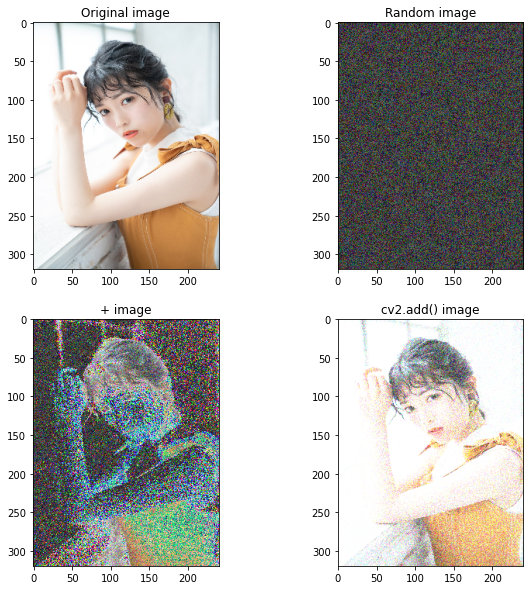

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.resize(cv2.imread("face.jpg"), (240, 320))
img2 = np.random.randint(0, 128, size=(320, 240, 3), dtype=np.uint8)
add_img = img+img2
add_img2 = cv2.add(img, img2)

plt.figure(figsize=(10,10))
# plt.axis("off")

plt.subplot(2,2,1)
plt.title("Original image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(2,2,2)
plt.title("Random image")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.subplot(2,2,3)
plt.title("+ image")
plt.imshow(cv2.cvtColor(add_img, cv2.COLOR_BGR2RGB))

plt.subplot(2,2,4)
plt.title("cv2.add() image")
plt.imshow(cv2.cvtColor(add_img2, cv2.COLOR_BGR2RGB))
plt.show()

# 影像加權和:&nbsp;&nbsp;在計算兩幅影像的像素值之和時，將影像的加權比例考慮進來。
※影像的尺寸大小需要一致，否則會有錯誤。<br><br>

公式可以表示為以下:
$$ dst = saturate(scr1\times\alpha+src2\times \beta
+\gamma) $$

dst = cv2.addWeighted(image1, alpha, image2, beta, gamma):<br>
"alpha"為image1的係數，"beta"為image2的係數, gamma可以為0，用於整體加權後的係數。

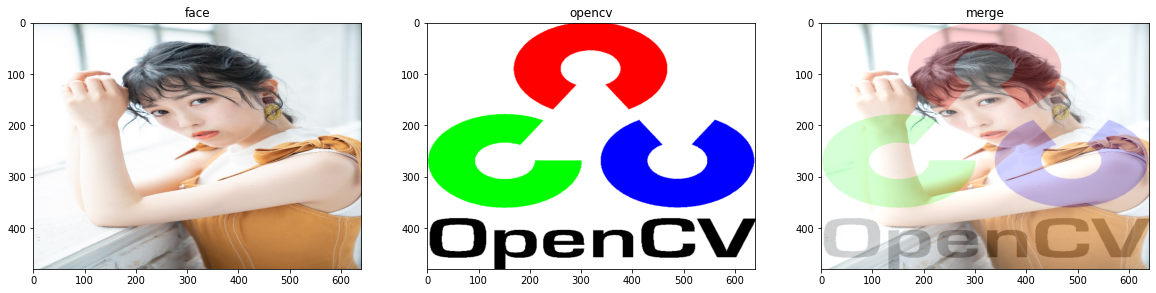

In [32]:
import cv2
import matplotlib.pyplot as plt

opencv = cv2.resize(cv2.cvtColor(cv2.imread("opencv.png"), cv2.COLOR_BGR2RGB), (640, 480))
face = cv2.resize(cv2.cvtColor(cv2.imread("face.jpg"), cv2.COLOR_BGR2RGB), (640, 480))

merge = cv2.addWeighted(face, 0.8, opencv, 0.2, 10)

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.title("face")
plt.imshow(face)

plt.subplot(132)
plt.title("opencv")
plt.imshow(opencv)

plt.subplot(133)
plt.title("merge")
plt.imshow(merge)

plt.show()